In [19]:
import pandas as pd
import json

path_1 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books_unprocessed.csv"
path_2 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books.csv"
path_3 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books_processed.csv"

df_unprocessed = pd.read_csv(path_1)
df = pd.read_csv(path_2)
df_processed = pd.read_csv(path_3)

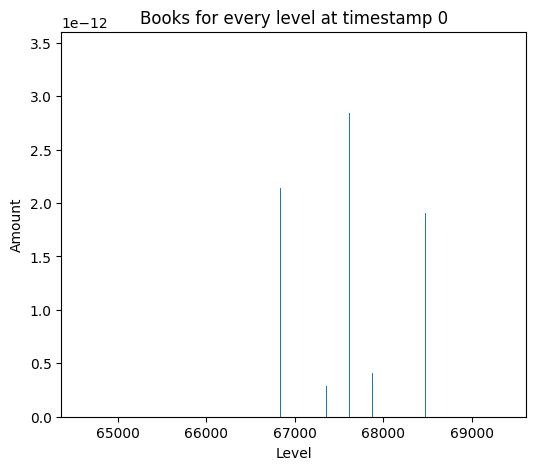

In [57]:
import matplotlib.pyplot as plt

plot_data = json.load(open("/workspaces/fastmoonStreams/sample_data/None.json", "r"))
# Create the bar plot
plt.figure(figsize=(6, 5))  # Adjust figure size as needed
plt.bar(plot_data['x'], plot_data['y'], )  # Customize colors
plt.ylim(bottom=0, top = max(plot_data['y']) / 3) 
# Add labels and title
plt.xlabel(plot_data['xlabel'])
plt.ylabel(plot_data['ylabel'])
plt.title(plot_data['legend'])

# # Display the plot
plt.show()